In [586]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/jodelcornelio/Downloads/crypto-markets-2.csv',parse_dates=['date'])
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


In [427]:
distinct = df.name.unique()
print(distinct[0:3])
print(len(distinct))
print(df.shape)

['Bitcoin' 'Ethereum' 'Ripple']
1643
(785024, 13)


In [441]:
df_btc = df.loc[df['name'] ==  'Bitcoin']
df_btc = df_btc.set_index('date')
df_btc = df_btc.sort_index(ascending=True)
df_eth = df.loc[df['name'] ==  'Ethereum']
df_eth = df_eth.set_index('date')
df_eth = df_eth.sort_index(ascending=True)
df_rpx = df.loc[df['name'] ==  'Ripple']
df_rpx = df_rpx.set_index('date')
df_rpx = df_rpx.sort_index(ascending=True)
print(df_btc.shape)
print(df_eth.shape)
print(df_rpx.shape)

(1866, 12)
(1035, 12)
(1768, 12)


In [429]:
df_btc.tail()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2018-06-02,bitcoin,BTC,Bitcoin,1,7536.72,7695.83,7497.26,7643.45,4.939300e+09,1.286450e+11,0.7362,198.57
2018-06-03,bitcoin,BTC,Bitcoin,1,7632.09,7754.89,7613.04,7720.25,4.851760e+09,1.302880e+11,0.7558,141.85
2018-06-04,bitcoin,BTC,Bitcoin,1,7722.53,7753.82,7474.04,7514.47,4.993170e+09,1.318470e+11,0.1445,279.78
2018-06-05,bitcoin,BTC,Bitcoin,1,7500.90,7643.23,7397.00,7633.76,4.961740e+09,1.280810e+11,0.9615,246.23
2018-06-06,bitcoin,BTC,Bitcoin,1,7625.97,7680.43,7502.01,7653.98,4.692260e+09,1.302330e+11,0.8518,178.42


In [430]:
df_eth.tail()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2018-06-02,ethereum,ETH,Ethereum,2,580.43,597.08,577.32,591.81,1.880390e+09,5.793290e+10,0.7333,19.76
2018-06-03,ethereum,ETH,Ethereum,2,591.26,624.51,591.26,618.33,1.832550e+09,5.902610e+10,0.8141,33.25
2018-06-04,ethereum,ETH,Ethereum,2,619.44,623.43,583.75,592.99,1.903430e+09,6.185180e+10,0.2329,39.68
2018-06-05,ethereum,ETH,Ethereum,2,593.41,611.33,580.98,609.30,1.844270e+09,5.926490e+10,0.9331,30.35
2018-06-06,ethereum,ETH,Ethereum,2,610.26,611.64,596.40,607.12,1.756530e+09,6.096070e+10,0.7034,15.24


In [431]:
df_rpx.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-08-04,ripple,XRP,Ripple,3,0.005874,0.005927,0.005874,0.005882,0.0,45921000.0,0.1509,0.0
2013-08-05,ripple,XRP,Ripple,3,0.005875,0.005980,0.005613,0.005613,0.0,45928400.0,0.0000,0.0
2013-08-06,ripple,XRP,Ripple,3,0.005637,0.005661,0.004629,0.004680,0.0,44067600.0,0.0494,0.0
2013-08-07,ripple,XRP,Ripple,3,0.004669,0.004682,0.004333,0.004417,0.0,36503500.0,0.2407,0.0
2013-08-08,ripple,XRP,Ripple,3,0.004397,0.004424,0.004175,0.004254,0.0,34372500.0,0.3173,0.0


In [436]:
df_rpx_time = df_rpx[df_rpx.index.map(pd.to_datetime)>=pd.to_datetime('2015-08-07')]
df_btc_time = df_btc[df_btc.index.map(pd.to_datetime)>=pd.to_datetime('2015-08-07')]

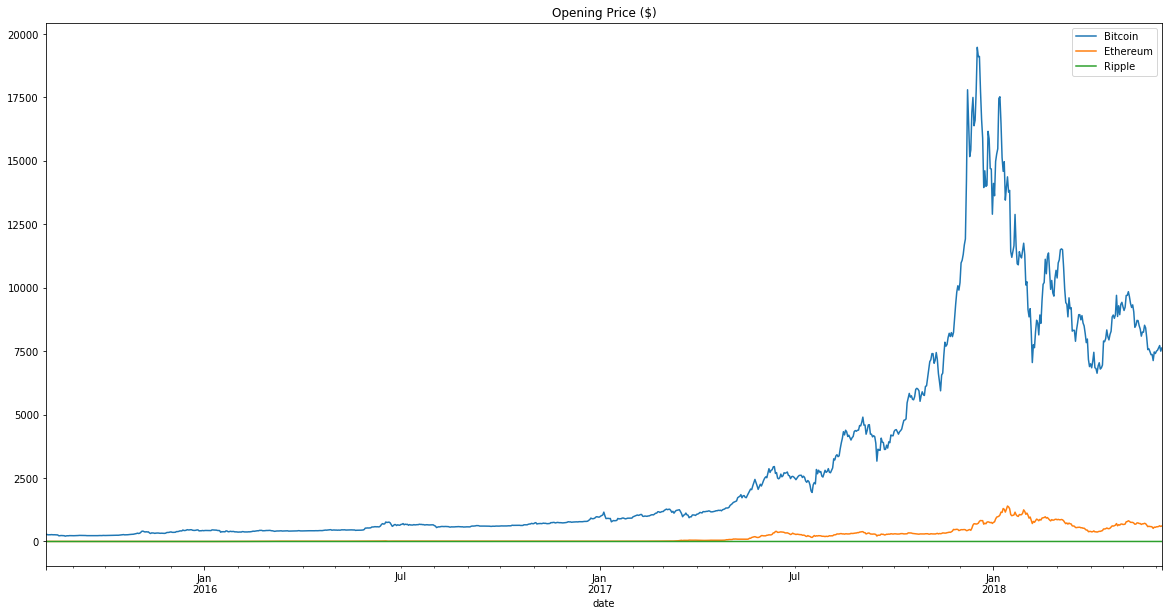

In [495]:
plt.figure(figsize=(20,10))
df_btc_time['open'].plot()
df_eth['open'].plot()
df_rpx_time['open'].plot()
plt.legend(['Bitcoin','Ethereum','Ripple'])
plt.title('Opening Price ($)')
plt.show()

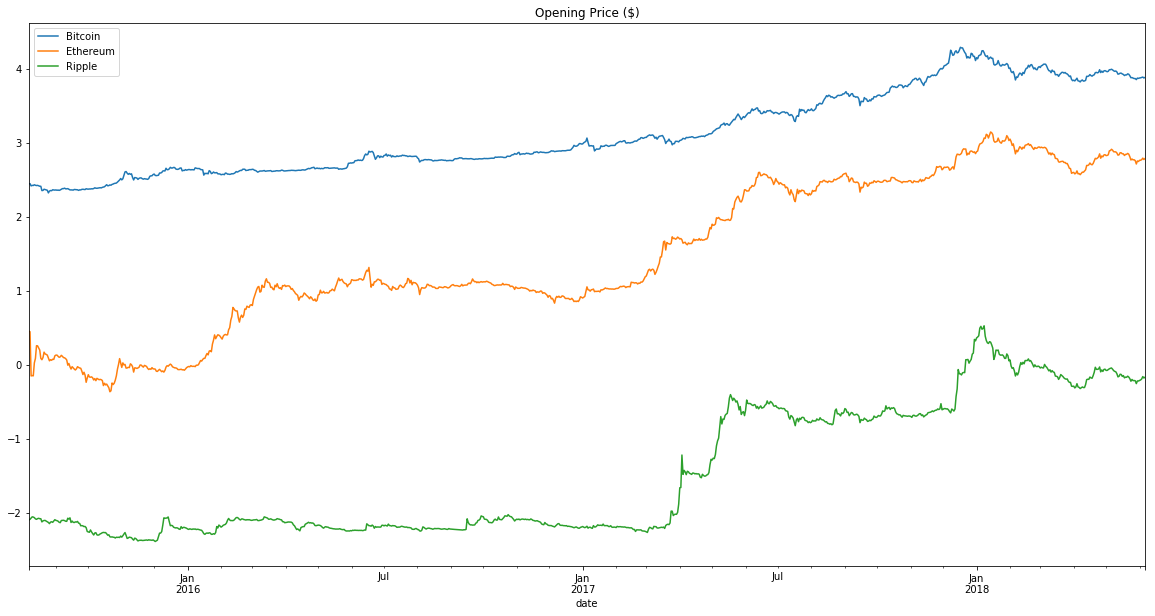

In [434]:
plt.figure(figsize=(20,10))
np.log10(df_btc_time['open']).plot()
np.log10(df_eth['open']).plot()
np.log10(df_rpx_time['open']).plot()
plt.legend(['Bitcoin','Ethereum','Ripple'])
plt.title('Opening Price ($)')
plt.show()

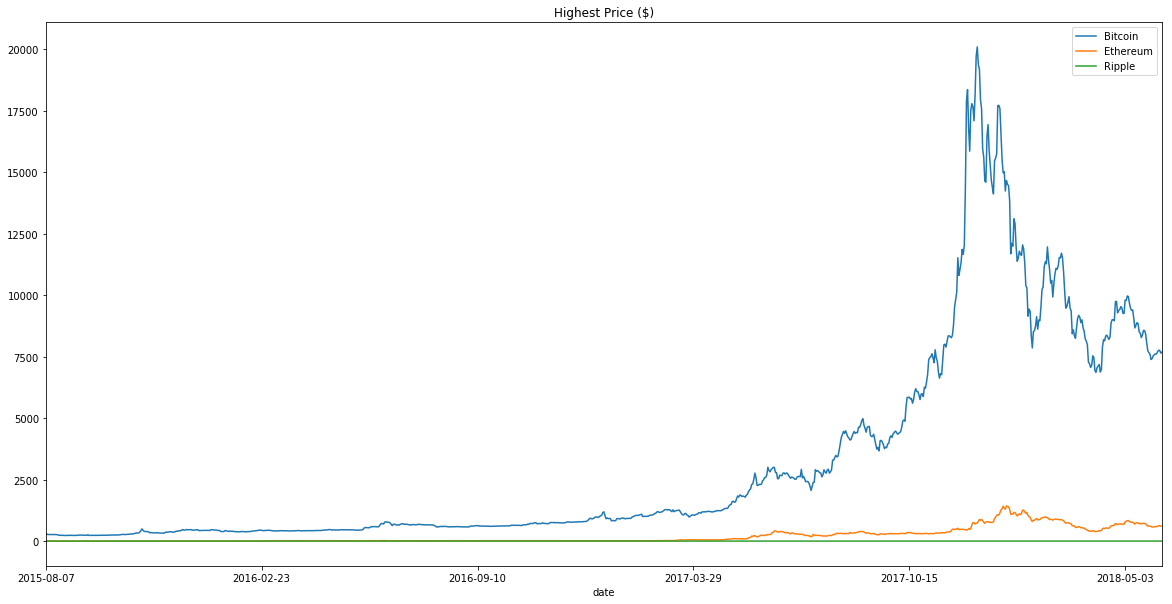

In [330]:
plt.figure(figsize=(20,10))
df_btc_time['high'].plot()
df_eth['high'].plot()
df_rpx_time['high'].plot()
plt.legend(['Bitcoin','Ethereum','Ripple'])
plt.title('Highest Price ($)')
plt.show()

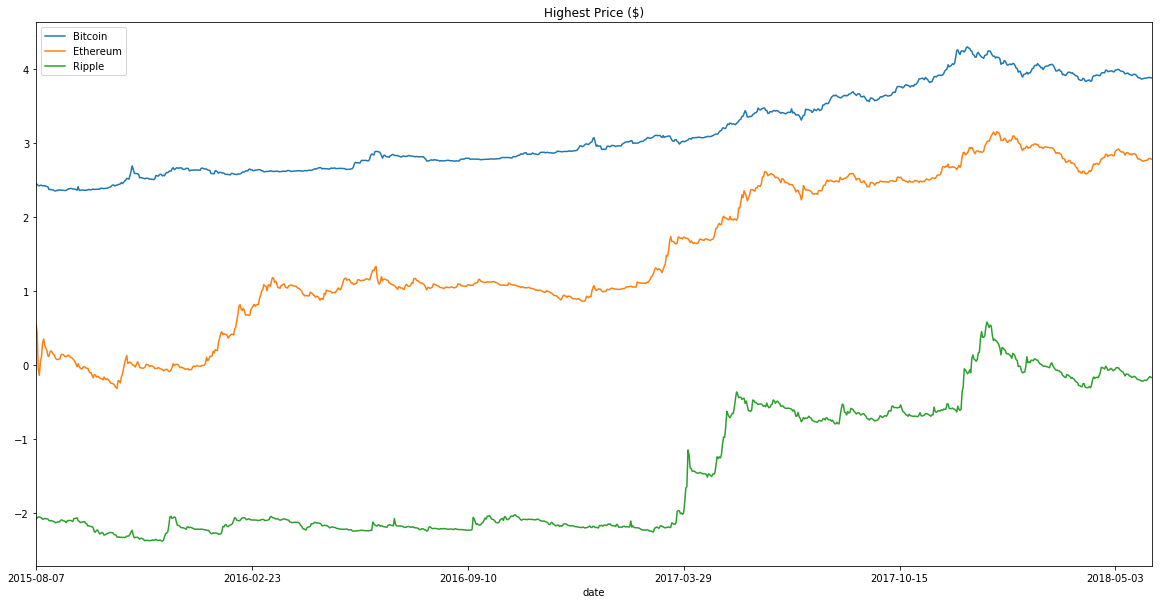

In [334]:
plt.figure(figsize=(20,10))
np.log10(df_btc_time['high']).plot()
np.log10(df_eth['high']).plot()
np.log10(df_rpx_time['high']).plot()
plt.legend(['Bitcoin','Ethereum','Ripple'])
plt.title('Highest Price ($)')
plt.show()

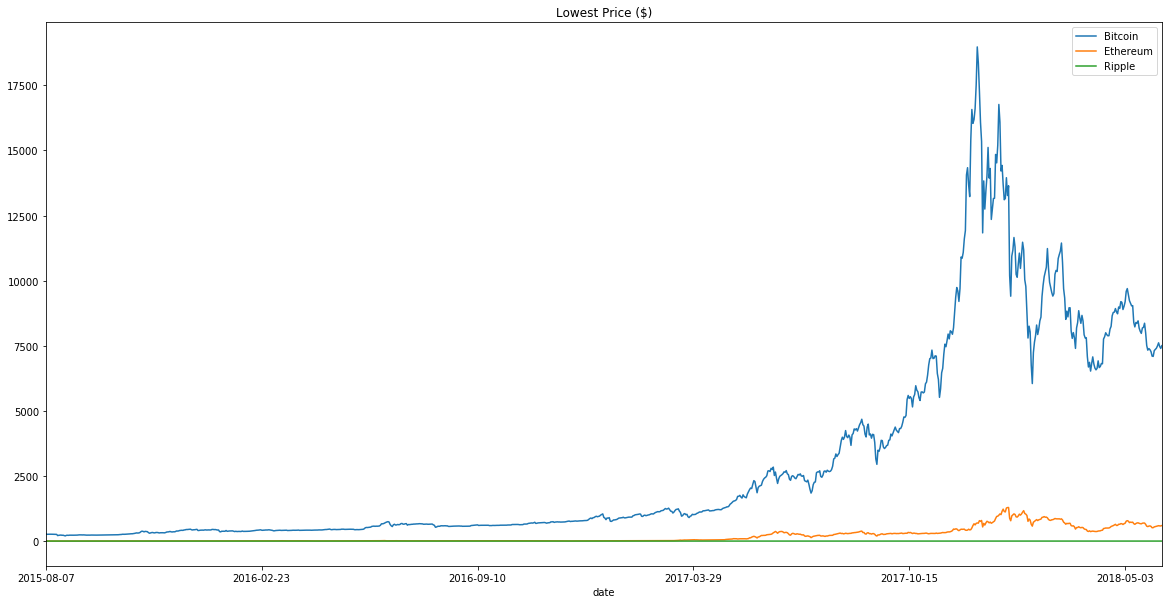

In [331]:
plt.figure(figsize=(20,10))
df_btc_time['low'].plot()
df_eth['low'].plot()
df_rpx_time['low'].plot()
plt.legend(['Bitcoin','Ethereum','Ripple'])
plt.title('Lowest Price ($)')
plt.show()

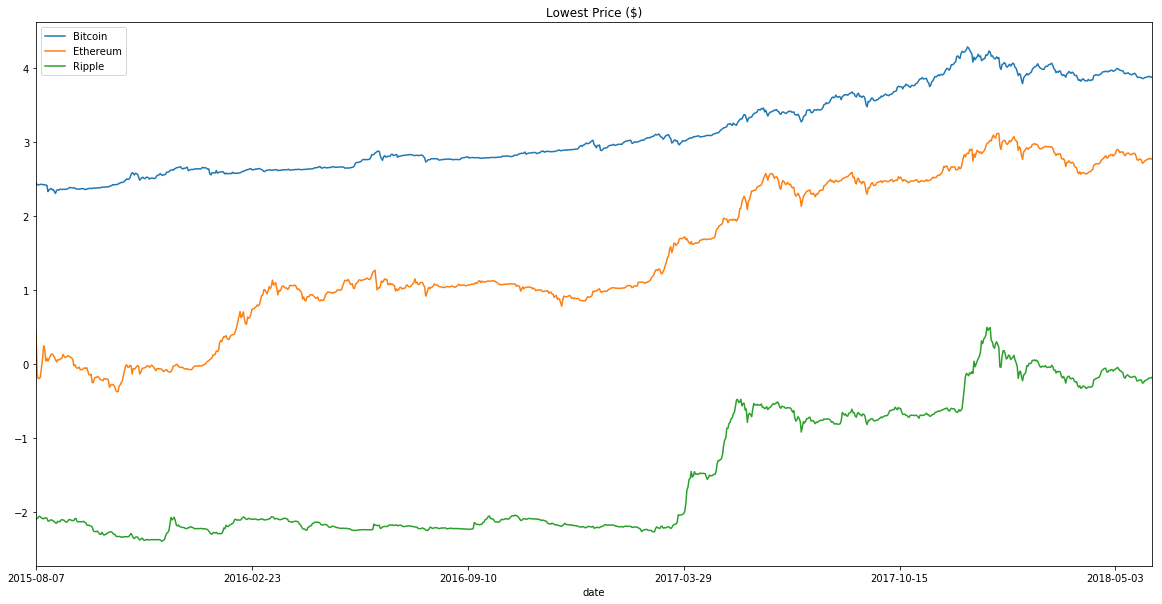

In [335]:
plt.figure(figsize=(20,10))
np.log10(df_btc_time['low']).plot()
np.log10(df_eth['low']).plot()
np.log10(df_rpx_time['low']).plot()
plt.legend(['Bitcoin','Ethereum','Ripple'])
plt.title('Lowest Price ($)')
plt.show()

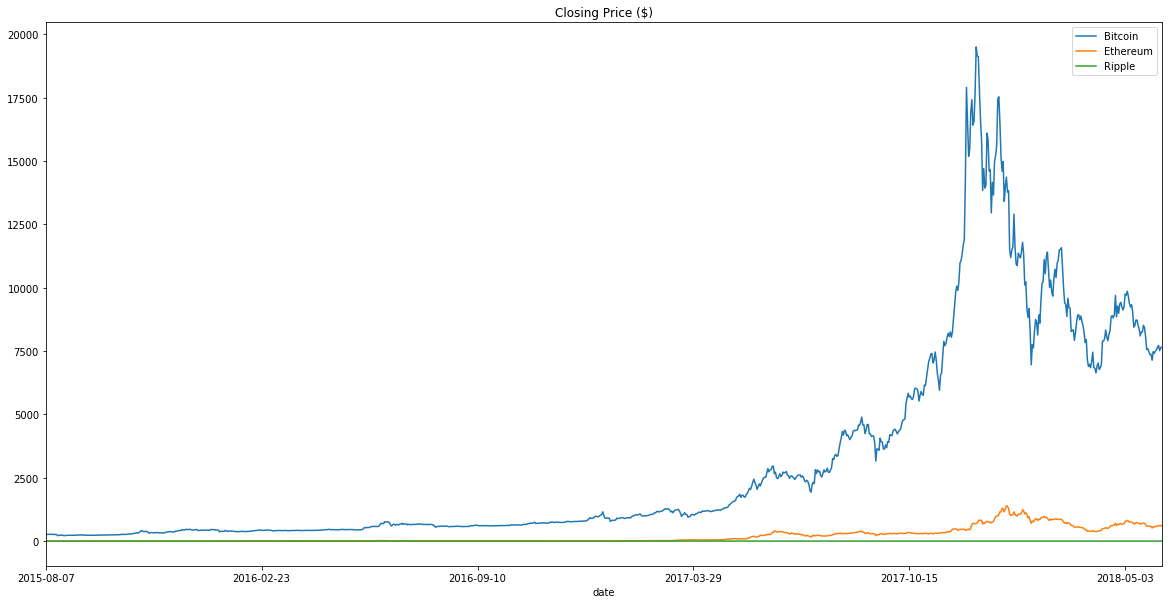

In [333]:
plt.figure(figsize=(20,10))
df_btc_time['close'].plot()
df_eth['close'].plot()
df_rpx_time['close'].plot()
plt.legend(['Bitcoin','Ethereum','Ripple'])
plt.title('Closing Price ($)')
plt.show()

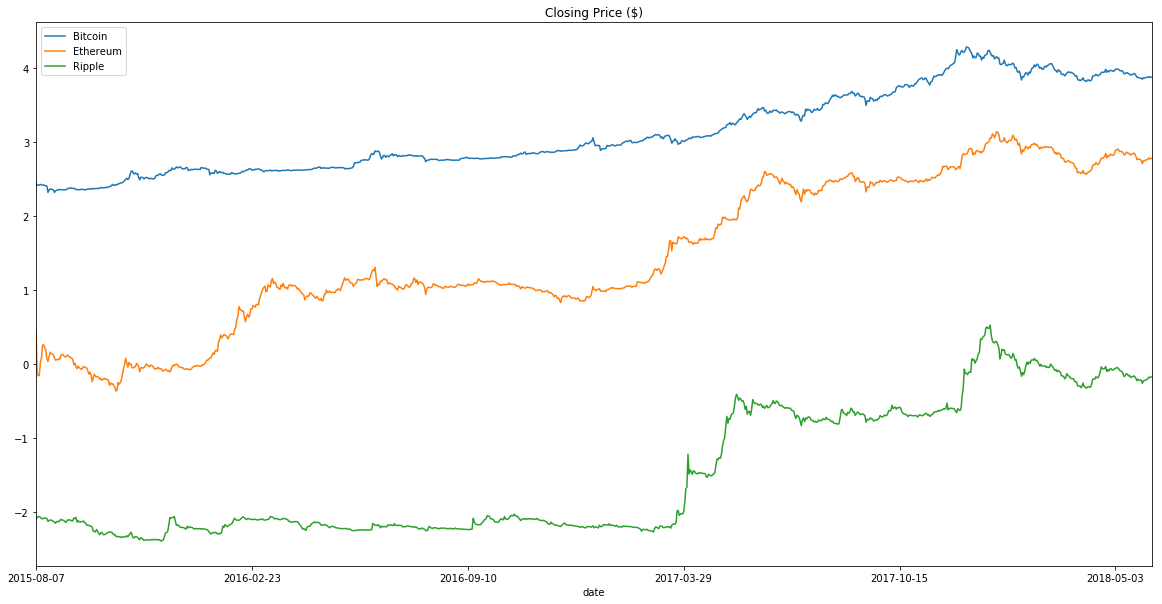

In [336]:
plt.figure(figsize=(20,10))
np.log10(df_btc_time['close']).plot()
np.log10(df_eth['close']).plot()
np.log10(df_rpx_time['close']).plot()
plt.legend(['Bitcoin','Ethereum','Ripple'])
plt.title('Closing Price ($)')
plt.show()

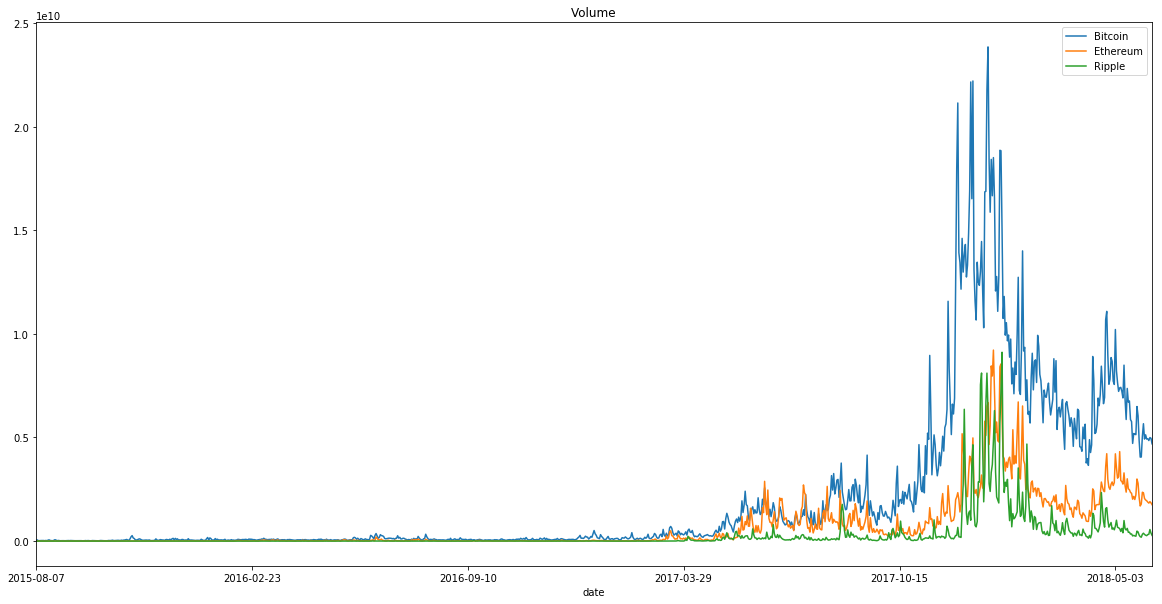

In [340]:
plt.figure(figsize=(20,10))
df_btc_time['volume'].plot()
df_eth['volume'].plot()
df_rpx_time['volume'].plot()
plt.title('Volume')
plt.legend(['Bitcoin','Ethereum','Ripple'])
plt.show()

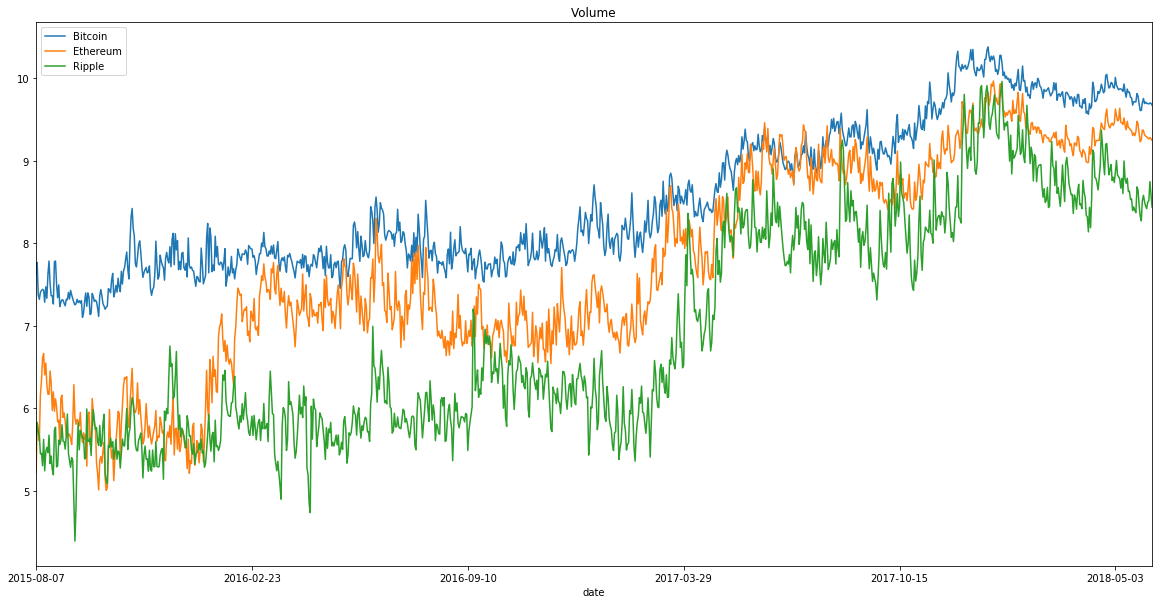

In [339]:
plt.figure(figsize=(20,10))
np.log10(df_btc_time['volume']).plot()
np.log10(df_eth['volume']).plot()
np.log10(df_rpx_time['volume']).plot()
plt.title('Volume')
plt.legend(['Bitcoin','Ethereum','Ripple'])
plt.show()

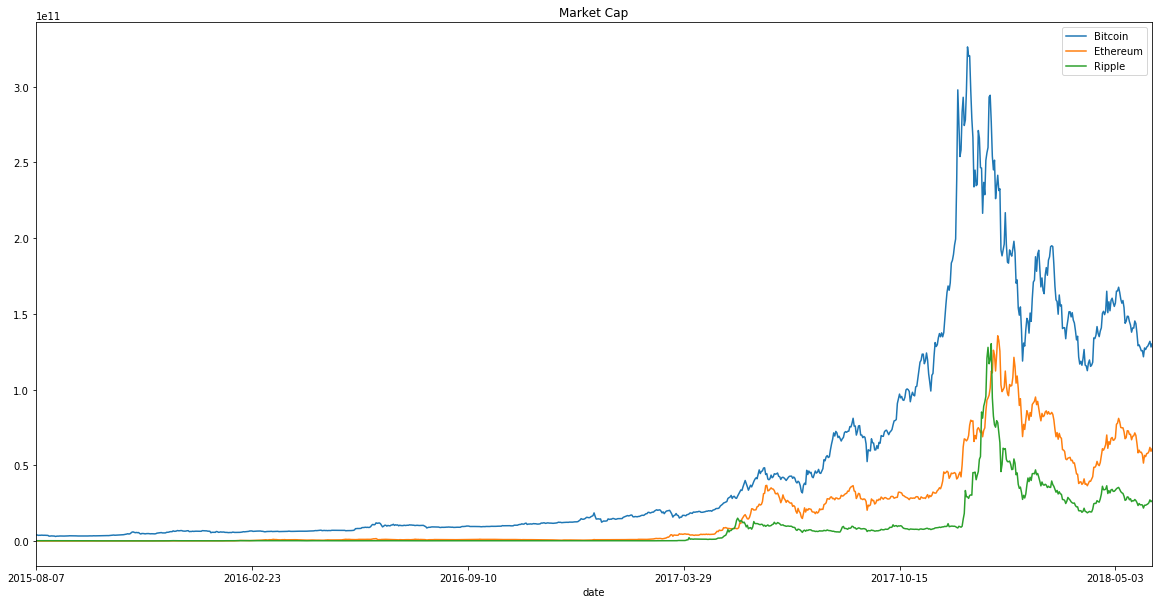

In [341]:
plt.figure(figsize=(20,10))
df_btc_time['market'].plot()
df_eth['market'].plot()
df_rpx_time['market'].plot()
plt.title('Market Cap')
plt.legend(['Bitcoin','Ethereum','Ripple'])
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


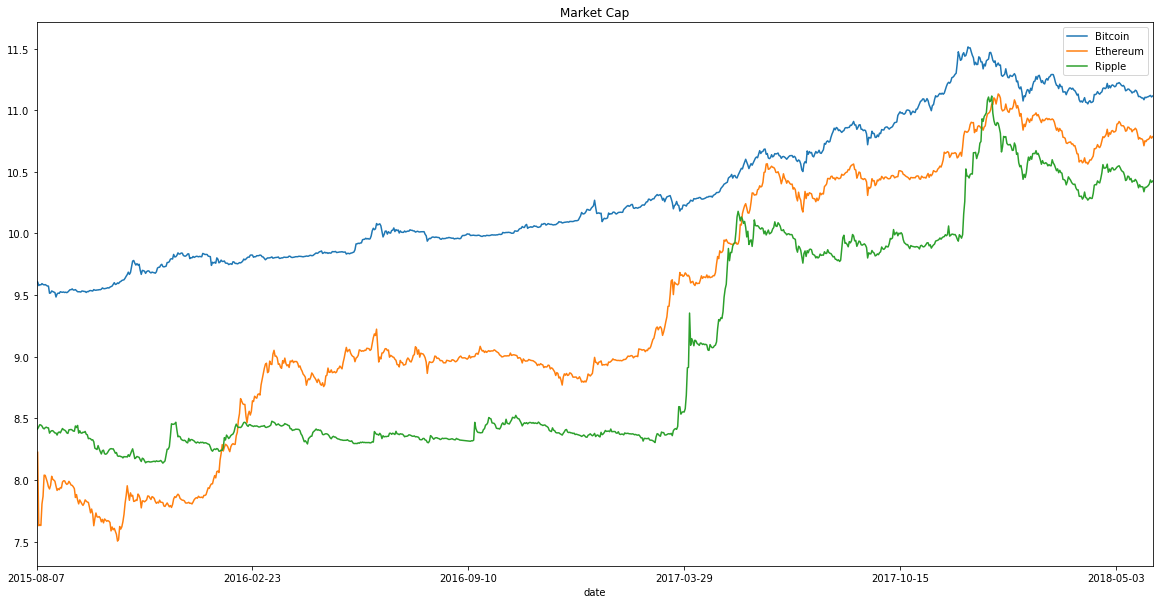

In [342]:
plt.figure(figsize=(20,10))
np.log10(df_btc_time['market']).plot()
np.log10(df_eth['market']).plot()
np.log10(df_rpx_time['market']).plot()
plt.title('Market Cap')
plt.legend(['Bitcoin','Ethereum','Ripple'])
plt.show()

In [580]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ["Bitcoin"]
pytrends.build_payload(kw_list, cat=0, timeframe='2017-12-28 2018-02-11', geo='', gprop='')

ResponseError: The request failed: Google returned a response with code 429.

In [418]:
df_btc_time['Date'] = df_btc_time.index
df_rpx_time['Date'] = df_rpx_time.index
df_eth['Date'] = df_eth.index

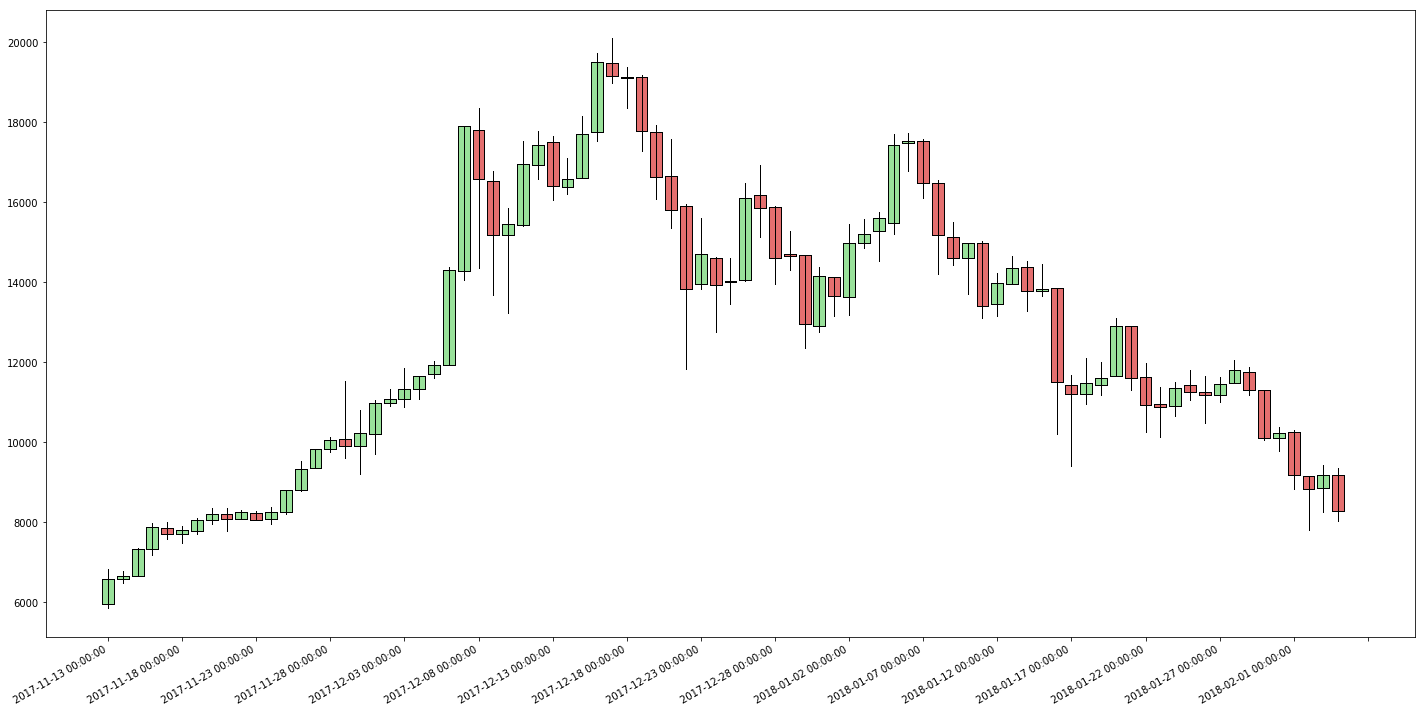

In [573]:
from matplotlib.finance import candlestick2_ohlc
import matplotlib.ticker as ticker
import datetime as datetime

temp_df_btc = df_btc_time[(df_btc_time.index>'2017-11-12') & (df_btc_time.index<'2018-02-05') ]

fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick2_ohlc(ax1,temp_df_btc['open'],temp_df_btc['high'],temp_df_btc['low'],temp_df_btc['close'],width = 0.8, colorup='#77d879', colordown='#db3f3f')

xdate = temp_df_btc.index
ax1.xaxis.set_major_locator(ticker.MaxNLocator(20))

def mydate(x,pos):
    try:
        return xdate[int(x)]
    except IndexError:
        return ''

ax1.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))

fig.autofmt_xdate()
fig.tight_layout()

plt.show()

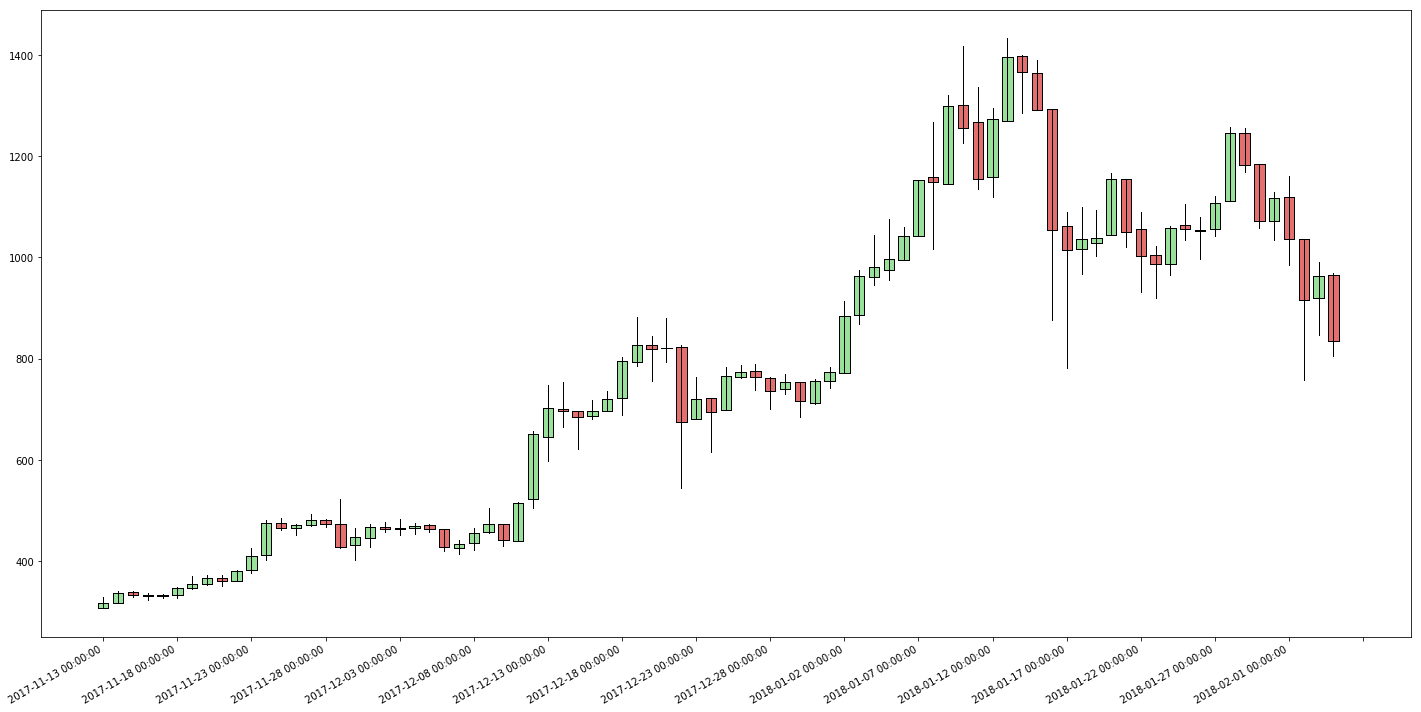

In [574]:
from matplotlib.finance import candlestick2_ohlc
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

temp_df_eth = df_eth[(df_eth.index>'2017-11-12') & (df_eth.index<'2018-02-05') ]

fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick2_ohlc(ax1,temp_df_eth['open'],temp_df_eth['high'],temp_df_eth['low'],temp_df_eth['close'],width=0.7, colorup='#77d879', colordown='#db3f3f')

xdate = temp_df_eth.index
ax1.xaxis.set_major_locator(ticker.MaxNLocator(20))

def mydate(x,pos):
    try:
        return xdate[int(x)]
    except IndexError:
        return ''

ax1.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))

fig.autofmt_xdate()
fig.tight_layout()

plt.show()

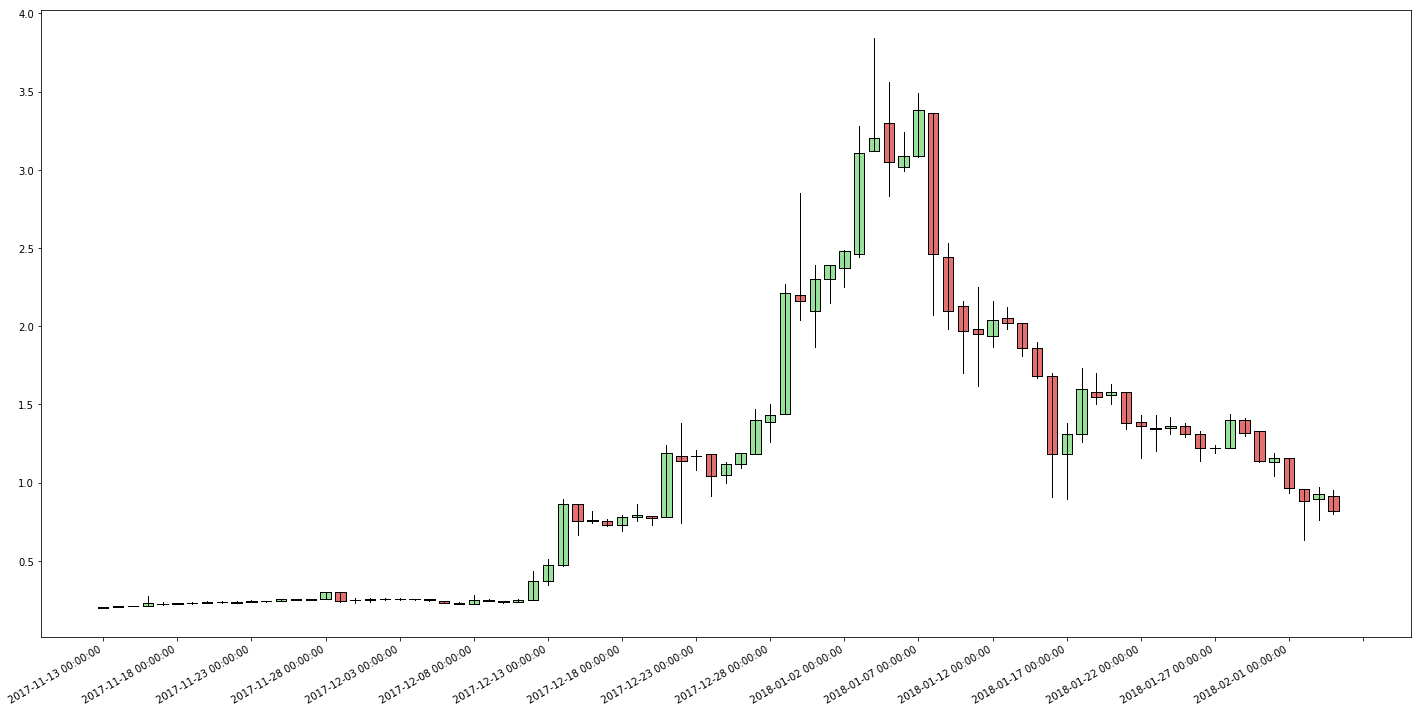

In [575]:
from matplotlib.finance import candlestick2_ohlc
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

temp_df_rpx = df_rpx_time[(df_rpx_time.index>'2017-11-12') & (df_rpx_time.index<'2018-02-05') ]

fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick2_ohlc(ax1,temp_df_rpx['open'],temp_df_rpx['high'],temp_df_rpx['low'],temp_df_rpx['close'],width=0.7, colorup='#77d879', colordown='#db3f3f')

xdate = temp_df_rpx.index
ax1.xaxis.set_major_locator(ticker.MaxNLocator(20))

def mydate(x,pos):
    try:
        return xdate[int(x)]
    except IndexError:
        return ''

ax1.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))

fig.autofmt_xdate()
fig.tight_layout()

plt.show()

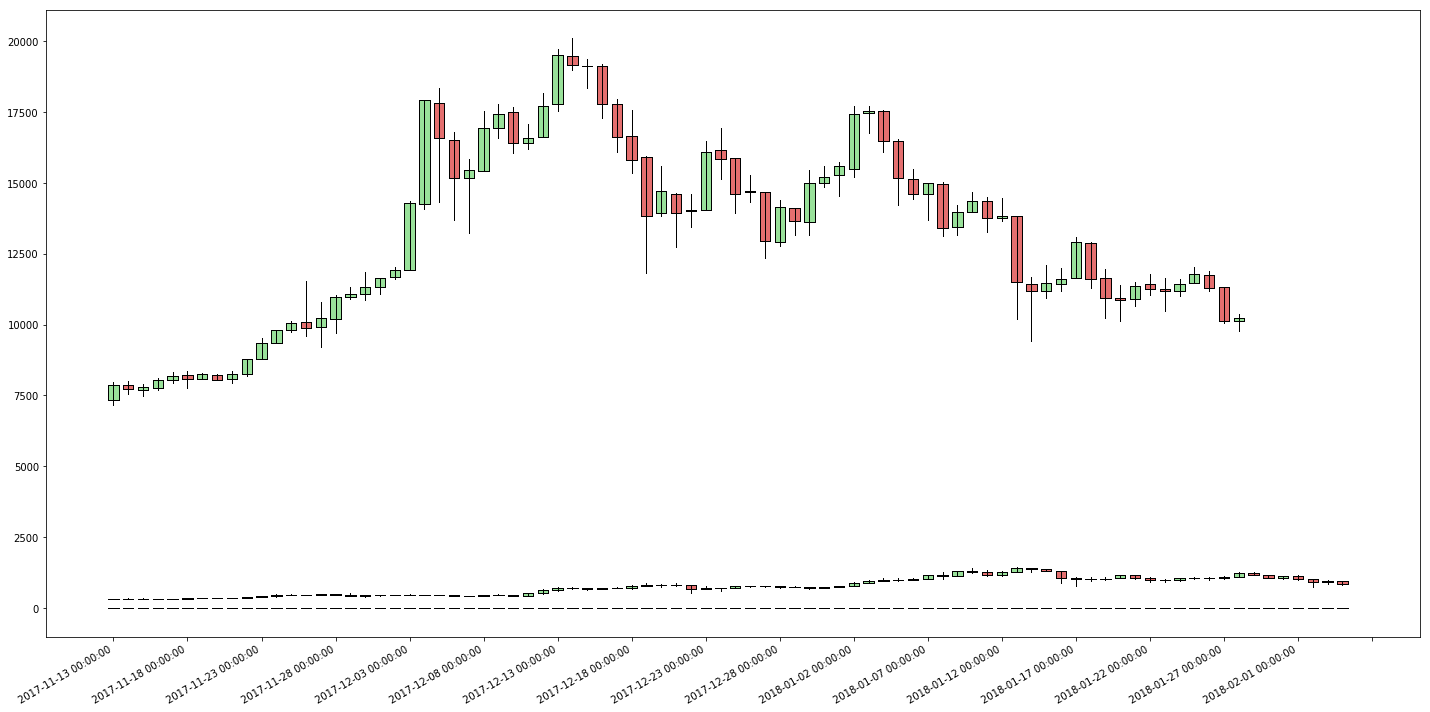

In [578]:
temp_df_btc = df_btc_time[(df_btc_time.index>'2017-11-15') & (df_btc_time.index<'2018-02-01') ]

fig1 = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick2_ohlc(ax1,temp_df_btc['open'],temp_df_btc['high'],temp_df_btc['low'],temp_df_btc['close'],width=0.7, colorup='#77d879', colordown='#db3f3f')



candlestick2_ohlc(ax1,temp_df_eth['open'],temp_df_eth['high'],temp_df_eth['low'],temp_df_eth['close'],width=0.7, colorup='#77d879', colordown='#db3f3f')



candlestick2_ohlc(ax1,temp_df_rpx['open'],temp_df_rpx['high'],temp_df_rpx['low'],temp_df_rpx['close'],width=0.7, colorup='#77d879', colordown='#db3f3f')

xdate = temp_df_rpx.index
ax1.xaxis.set_major_locator(ticker.MaxNLocator(20))

def mydate(x,pos):
    try:
        return xdate[int(x)]
    except IndexError:
        return ''

ax1.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))

fig1.autofmt_xdate()
fig1.tight_layout()




plt.show()

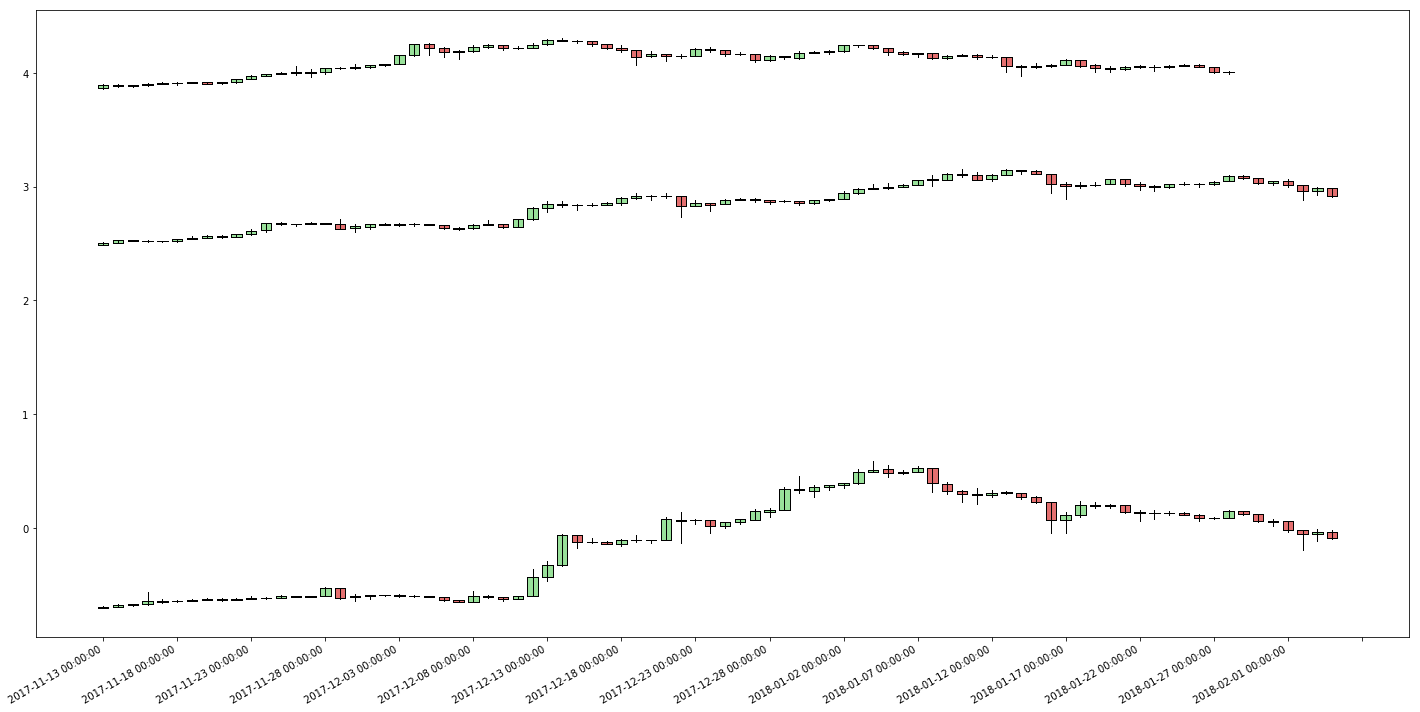

In [579]:
temp_df_btc = df_btc_time[(df_btc_time.index>'2017-11-15') & (df_btc_time.index<'2018-02-01') ]

fig1 = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick2_ohlc(ax1,np.log10(temp_df_btc['open']),np.log10(temp_df_btc['high']),np.log10(temp_df_btc['low']),np.log10(temp_df_btc['close']),width=0.7, colorup='#77d879', colordown='#db3f3f')


candlestick2_ohlc(ax1,np.log10(temp_df_eth['open']),np.log10(temp_df_eth['high']),np.log10(temp_df_eth['low']),np.log10(temp_df_eth['close']),width=0.7, colorup='#77d879', colordown='#db3f3f')



candlestick2_ohlc(ax1,np.log10(temp_df_rpx['open']),np.log10(temp_df_rpx['high']),np.log10(temp_df_rpx['low']),np.log10(temp_df_rpx['close']),width=0.7, colorup='#77d879', colordown='#db3f3f')


xdate = temp_df_rpx.index
ax1.xaxis.set_major_locator(ticker.MaxNLocator(20))

def mydate(x,pos):
    try:
        return xdate[int(x)]
    except IndexError:
        return ''

ax1.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))

fig1.autofmt_xdate()
fig1.tight_layout()

plt.show()

In [611]:
df_open_price = pd.concat([df_btc_time.open,df_eth.open,df_rpx_time.open],axis=1,keys=['BTC','ETH','RPX'])
df_open_price.head()
corr = df_open_price.corr(method='spearman')

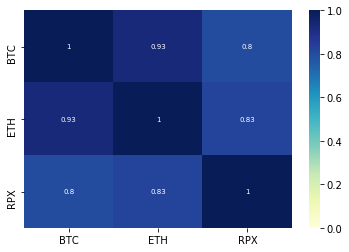

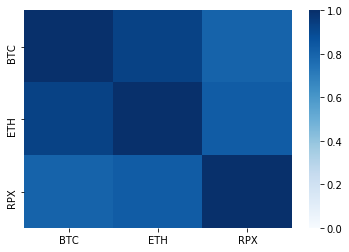

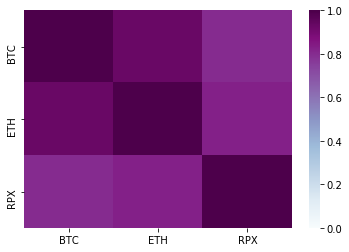

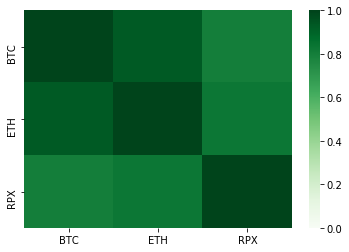

In [612]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, cmap="YlGnBu", vmin=0, vmax = 1,annot=True, annot_kws={"size": 7})
plt.show()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, cmap="Blues", vmin=0, vmax = 1)
plt.show()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="BuPu", vmin=0, vmax = 1)
plt.show()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, cmap="Greens", vmin=0, vmax = 1)
plt.show()

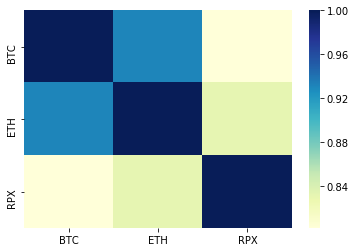

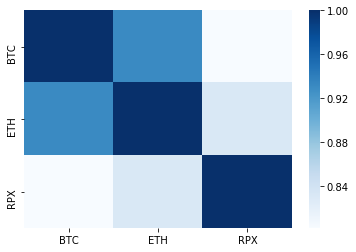

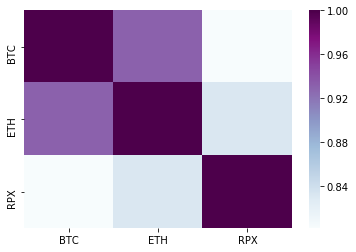

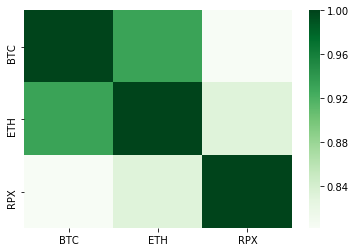

In [600]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, cmap="YlGnBu")
plt.show()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, cmap="Blues")
plt.show()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="BuPu")
plt.show()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, cmap="Greens")
plt.show()

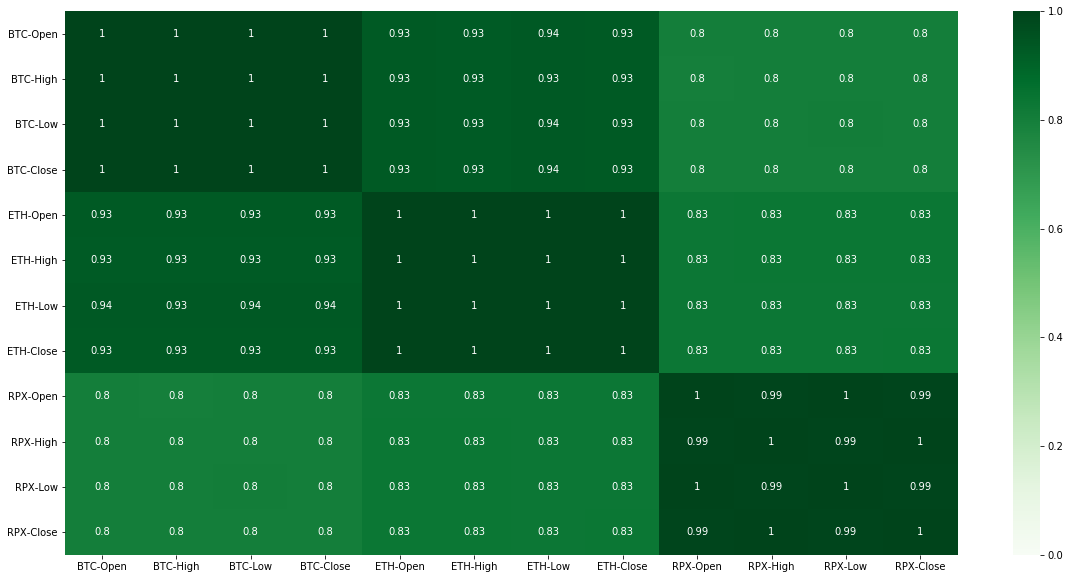

In [618]:
df_price = pd.concat([df_btc_time.open,df_btc_time.high,df_btc_time.low,df_btc_time.close,df_eth.open,df_eth.high,df_eth.low,df_eth.close,df_rpx_time.open,df_rpx_time.high,df_rpx_time.low,df_rpx_time.close],axis=1,keys=['BTC-Open','BTC-High','BTC-Low','BTC-Close','ETH-Open','ETH-High','ETH-Low','ETH-Close','RPX-Open','RPX-High','RPX-Low','RPX-Close'])
fig1 = plt.figure(figsize=(20,10))
corr_p = df_price.corr(method='spearman')
sns.heatmap(corr_p,xticklabels=corr_p.columns,yticklabels=corr_p.columns, cmap="Greens",vmax=1,vmin=0,annot=True, annot_kws={"size": 10})

plt.show()

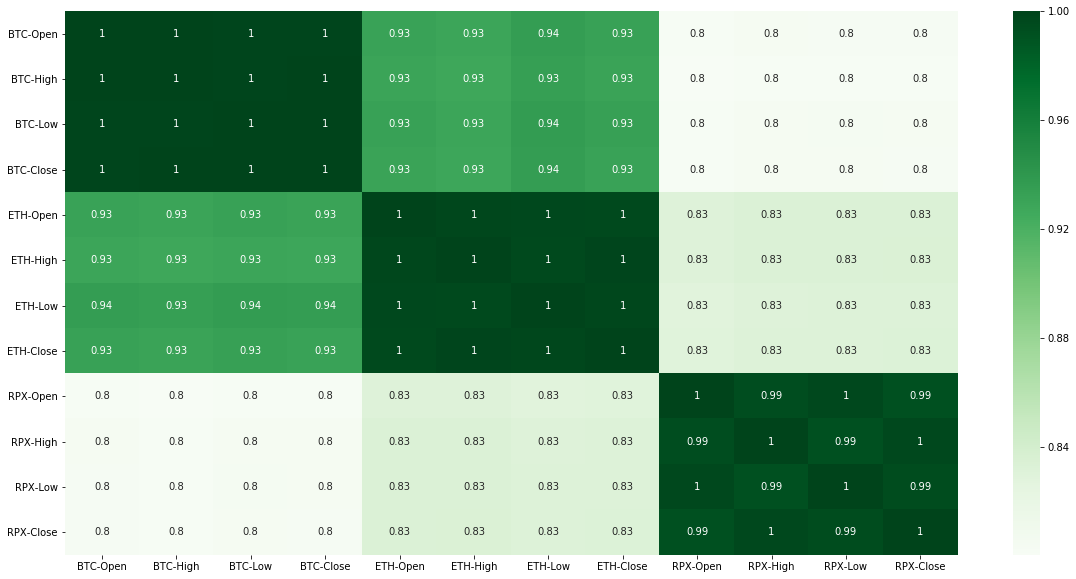

In [619]:
fig1 = plt.figure(figsize=(20,10))
corr_p = df_price.corr(method='spearman')
sns.heatmap(corr_p,xticklabels=corr_p.columns,yticklabels=corr_p.columns, cmap="Greens",annot=True, annot_kws={"size": 10})

plt.show()